In [1]:
import numpy as np
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from math import * # module math
import matplotlib.pyplot as plt # visualization
from PIL import Image
import seaborn as sns # visualization
import itertools
import io
import plotly.offline as py # visualization
py.init_notebook_mode(connected=True) # visualization
import plotly.graph_objs as go # visualization
from plotly.subplots import make_subplots
import plotly.figure_factory as ff # visualization
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, mean_absolute_error, mean_squared_error
#import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

In [2]:
df = pd.read_csv("Dataset.csv")
df_test = pd.read_csv("Dataset_test.csv")

In [3]:
df.head()

,customer_id,ownership,activation_plan_code,mnp_flag,calls_incoming_cnt,calls_outgoing_cnt,calls_incoming_duration,calls_outgoing_duration,total_call_count,total_sum_duration,...,last_cycle_plan_mrp,last_cycle_plan_validity,avg_days_bw_rchg_and_expiry,stddev_days_bw_rchg_and_expiry,price_per_day,gb_per_day_quota,pcnt_quota_used,device_avg_asp,recharge_delay,churn
0,10000,individual,4,0,31,333,31.980873,548.719448,364,580.700321,...,2999,700,-1.113238,2.801930,3.333333,1.5,6.864912,10K_to_20K,-3.221785,0
1,10001,individual,6,0,8,42,9.577651,43.988952,50,53.566603,...,2999,700,-2.032090,1.600223,5.550000,3.0,3.985185,10K_to_20K,-4.916200,0
2,10002,individual,8,1,13,0,15.368591,0.000000,13,15.368591,...,500,120,-2.350133,0.782016,4.571429,1.0,15.338890,20K_to_30K,4.455835,0
3,10003,individual,7,0,20,38,21.091508,52.044282,58,73.135790,...,500,120,2.366904,1.255292,4.284286,4.0,9.241717,less_10K,0.180850,0
4,10004,individual,3,1,22,29,25.592874,41.290402,51,66.883276,...,999,180,2.121814,3.132883,4.109589,3.0,12.263939,10K_to_20K,4.690059,0


In [4]:
df.shape

(800, 48)

In [5]:
df.isnull().sum()

customer_id                           0
ownership                             0
activation_plan_code                  0
mnp_flag                              0
calls_incoming_cnt                    0
calls_outgoing_cnt                    0
calls_incoming_duration               0
calls_outgoing_duration               0
total_call_count                      0
total_sum_duration                    0
tot_usage_mb                          0
upload_usage_mb                       0
download_usage_mb                     0
days_since_latch                      0
cnt_open_qrc                          0
avg_days_to_close                    21
cnt_call_drops                        0
pcnt_dropped_calls                    0
rsrp_voice_pcnt_poor_duration         0
rsrp_data_pcnt_poor_duration          0
mean_cqi_voice_pcnt_poor_duration     0
sinr_voice_pcnt_poor_duration         0
sinr_data_pcnt_poor_duration          0
age_on_network                        0
cnt_connections                       0


In [6]:
df[df["avg_days_to_close"].isnull()]

,customer_id,ownership,activation_plan_code,mnp_flag,calls_incoming_cnt,calls_outgoing_cnt,calls_incoming_duration,calls_outgoing_duration,total_call_count,total_sum_duration,...,last_cycle_plan_mrp,last_cycle_plan_validity,avg_days_bw_rchg_and_expiry,stddev_days_bw_rchg_and_expiry,price_per_day,gb_per_day_quota,pcnt_quota_used,device_avg_asp,recharge_delay,churn
15,10015,individual,8,0,72,40,108.450299,69.872379,112,178.322678,...,99,15,-5.162075,9.109403,4.166667,2.0,13.570079,less_10K,-3.206136,0
42,10042,individual,7,0,34,42,34.211552,72.437373,76,106.648925,...,2999,700,10.563870,7.243248,4.571429,1.0,33.793051,10K_to_20K,8.851919,1
60,10060,individual,8,0,64,110,124.837317,184.601143,174,309.438460,...,1500,365,-3.408692,0.618479,5.550000,3.0,13.071430,20K_to_30K,-15.108207,0
68,10068,individual,2,0,238,56,463.188520,110.660969,294,573.849489,...,500,120,-0.396398,2.457037,4.166667,2.0,30.892819,30K_to_50K,-6.543968,0
232,10232,individual,9,0,75,290,97.124685,302.281685,365,399.406370,...,999,180,-0.728904,0.739293,4.166667,2.0,36.762399,less_10K,1.517710,0
320,10320,individual,3,0,66,19,90.235387,34.789102,85,125.024489,...,2999,700,-9.638162,1.331552,6.600000,0.5,15.611493,10K_to_20K,-19.032666,0
335,10335,individual,10,0,179,5,286.280766,6.185478,184,292.466244,...,128,28,2.006593,0.483593,4.284286,4.0,2.601404,20K_to_30K,-5.070599,0
339,10339,individual,8,0,71,27,91.854772,46.862854,98,138.717626,...,999,180,-0.841057,0.827690,6.600000,0.5,101.806066,less_10K,-5.375697,0
358,10358,individual,4,0,45,77,87.978683,134.658966,122,222.637650,...,128,28,0.205498,0.981999,4.571429,1.0,105.265318,less_10K,-15.243323,0
359,10359,corporate,9,0,78,100,145.419123,121.731414,178,267.150537,...,128,28,-9.492640,1.195128,6.600000,0.5,40.634790,30K_to_50K,6.201665,0


In [7]:
df_test[df_test["avg_days_to_close"].isnull()]

,customer_id,ownership,activation_plan_code,mnp_flag,calls_incoming_cnt,calls_outgoing_cnt,calls_incoming_duration,calls_outgoing_duration,total_call_count,total_sum_duration,...,last_cycle_plan_mrp,last_cycle_plan_validity,avg_days_bw_rchg_and_expiry,stddev_days_bw_rchg_and_expiry,price_per_day,gb_per_day_quota,pcnt_quota_used,device_avg_asp,recharge_delay,churn
5,10805,corporate,6,0,3,58,5.625606,79.444596,61,85.070202,...,500,120,0.500283,4.322093,4.166667,2.0,34.286181,50K_above,-5.297571,0
80,10880,corporate,10,0,4,84,4.398423,152.343236,88,156.741659,...,128,28,-1.073072,0.038371,4.284286,4.0,2.487266,10K_to_20K,2.437748,0
83,10883,individual,9,0,47,90,73.431398,131.919739,137,205.351136,...,2999,700,-1.841938,1.555295,4.571429,1.0,121.938386,50K_above,-7.909317,0
121,10921,individual,2,0,54,246,95.087088,459.740754,300,554.827842,...,999,180,2.393238,2.937887,4.284286,4.0,5.735090,10K_to_20K,1.471730,0
164,10964,individual,7,1,160,136,265.393176,200.281172,296,465.674348,...,99,15,-0.779936,8.092230,4.166667,2.0,5.184371,50K_above,-5.724961,0


In [8]:
df['avg_days_to_close'].fillna(df['avg_days_to_close'].mean(), inplace=True)
df_test['avg_days_to_close'].fillna(df_test['avg_days_to_close'].mean(), inplace=True)

In [9]:
df.isnull().sum()

customer_id                          0
ownership                            0
activation_plan_code                 0
mnp_flag                             0
calls_incoming_cnt                   0
calls_outgoing_cnt                   0
calls_incoming_duration              0
calls_outgoing_duration              0
total_call_count                     0
total_sum_duration                   0
tot_usage_mb                         0
upload_usage_mb                      0
download_usage_mb                    0
days_since_latch                     0
cnt_open_qrc                         0
avg_days_to_close                    0
cnt_call_drops                       0
pcnt_dropped_calls                   0
rsrp_voice_pcnt_poor_duration        0
rsrp_data_pcnt_poor_duration         0
mean_cqi_voice_pcnt_poor_duration    0
sinr_voice_pcnt_poor_duration        0
sinr_data_pcnt_poor_duration         0
age_on_network                       0
cnt_connections                      0
current_plan_code        

In [10]:
print(df.nunique())

customer_id                          800
ownership                              2
activation_plan_code                  10
mnp_flag                               2
calls_incoming_cnt                   188
calls_outgoing_cnt                   184
calls_incoming_duration              793
calls_outgoing_duration              792
total_call_count                     268
total_sum_duration                   800
tot_usage_mb                         800
upload_usage_mb                      800
download_usage_mb                    800
days_since_latch                      20
cnt_open_qrc                          16
avg_days_to_close                     12
cnt_call_drops                       800
pcnt_dropped_calls                   800
rsrp_voice_pcnt_poor_duration        800
rsrp_data_pcnt_poor_duration         800
mean_cqi_voice_pcnt_poor_duration    800
sinr_voice_pcnt_poor_duration        800
sinr_data_pcnt_poor_duration         800
age_on_network                       500
cnt_connections 

In [12]:
# for c in df.columns[1:]:
#     df.boxplot(c,by='churn',figsize=(7,4),fontsize=14)
#     plt.title("{}\n".format(c),fontsize=16)
#     plt.xlabel("Churn", fontsize=16)

In [12]:
# Function to draw correlation heat map 

def corr_matrix(df):
  corr = df.corr()
  mask = np.triu(np.ones_like(corr, dtype=bool))
  f, ax = plt.subplots(figsize=(40,40))
  cmap = sns.diverging_palette(220, 10, as_cmap=True)
  sns.heatmap(corr, mask=mask, cmap="Paired", vmax=.3, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5})

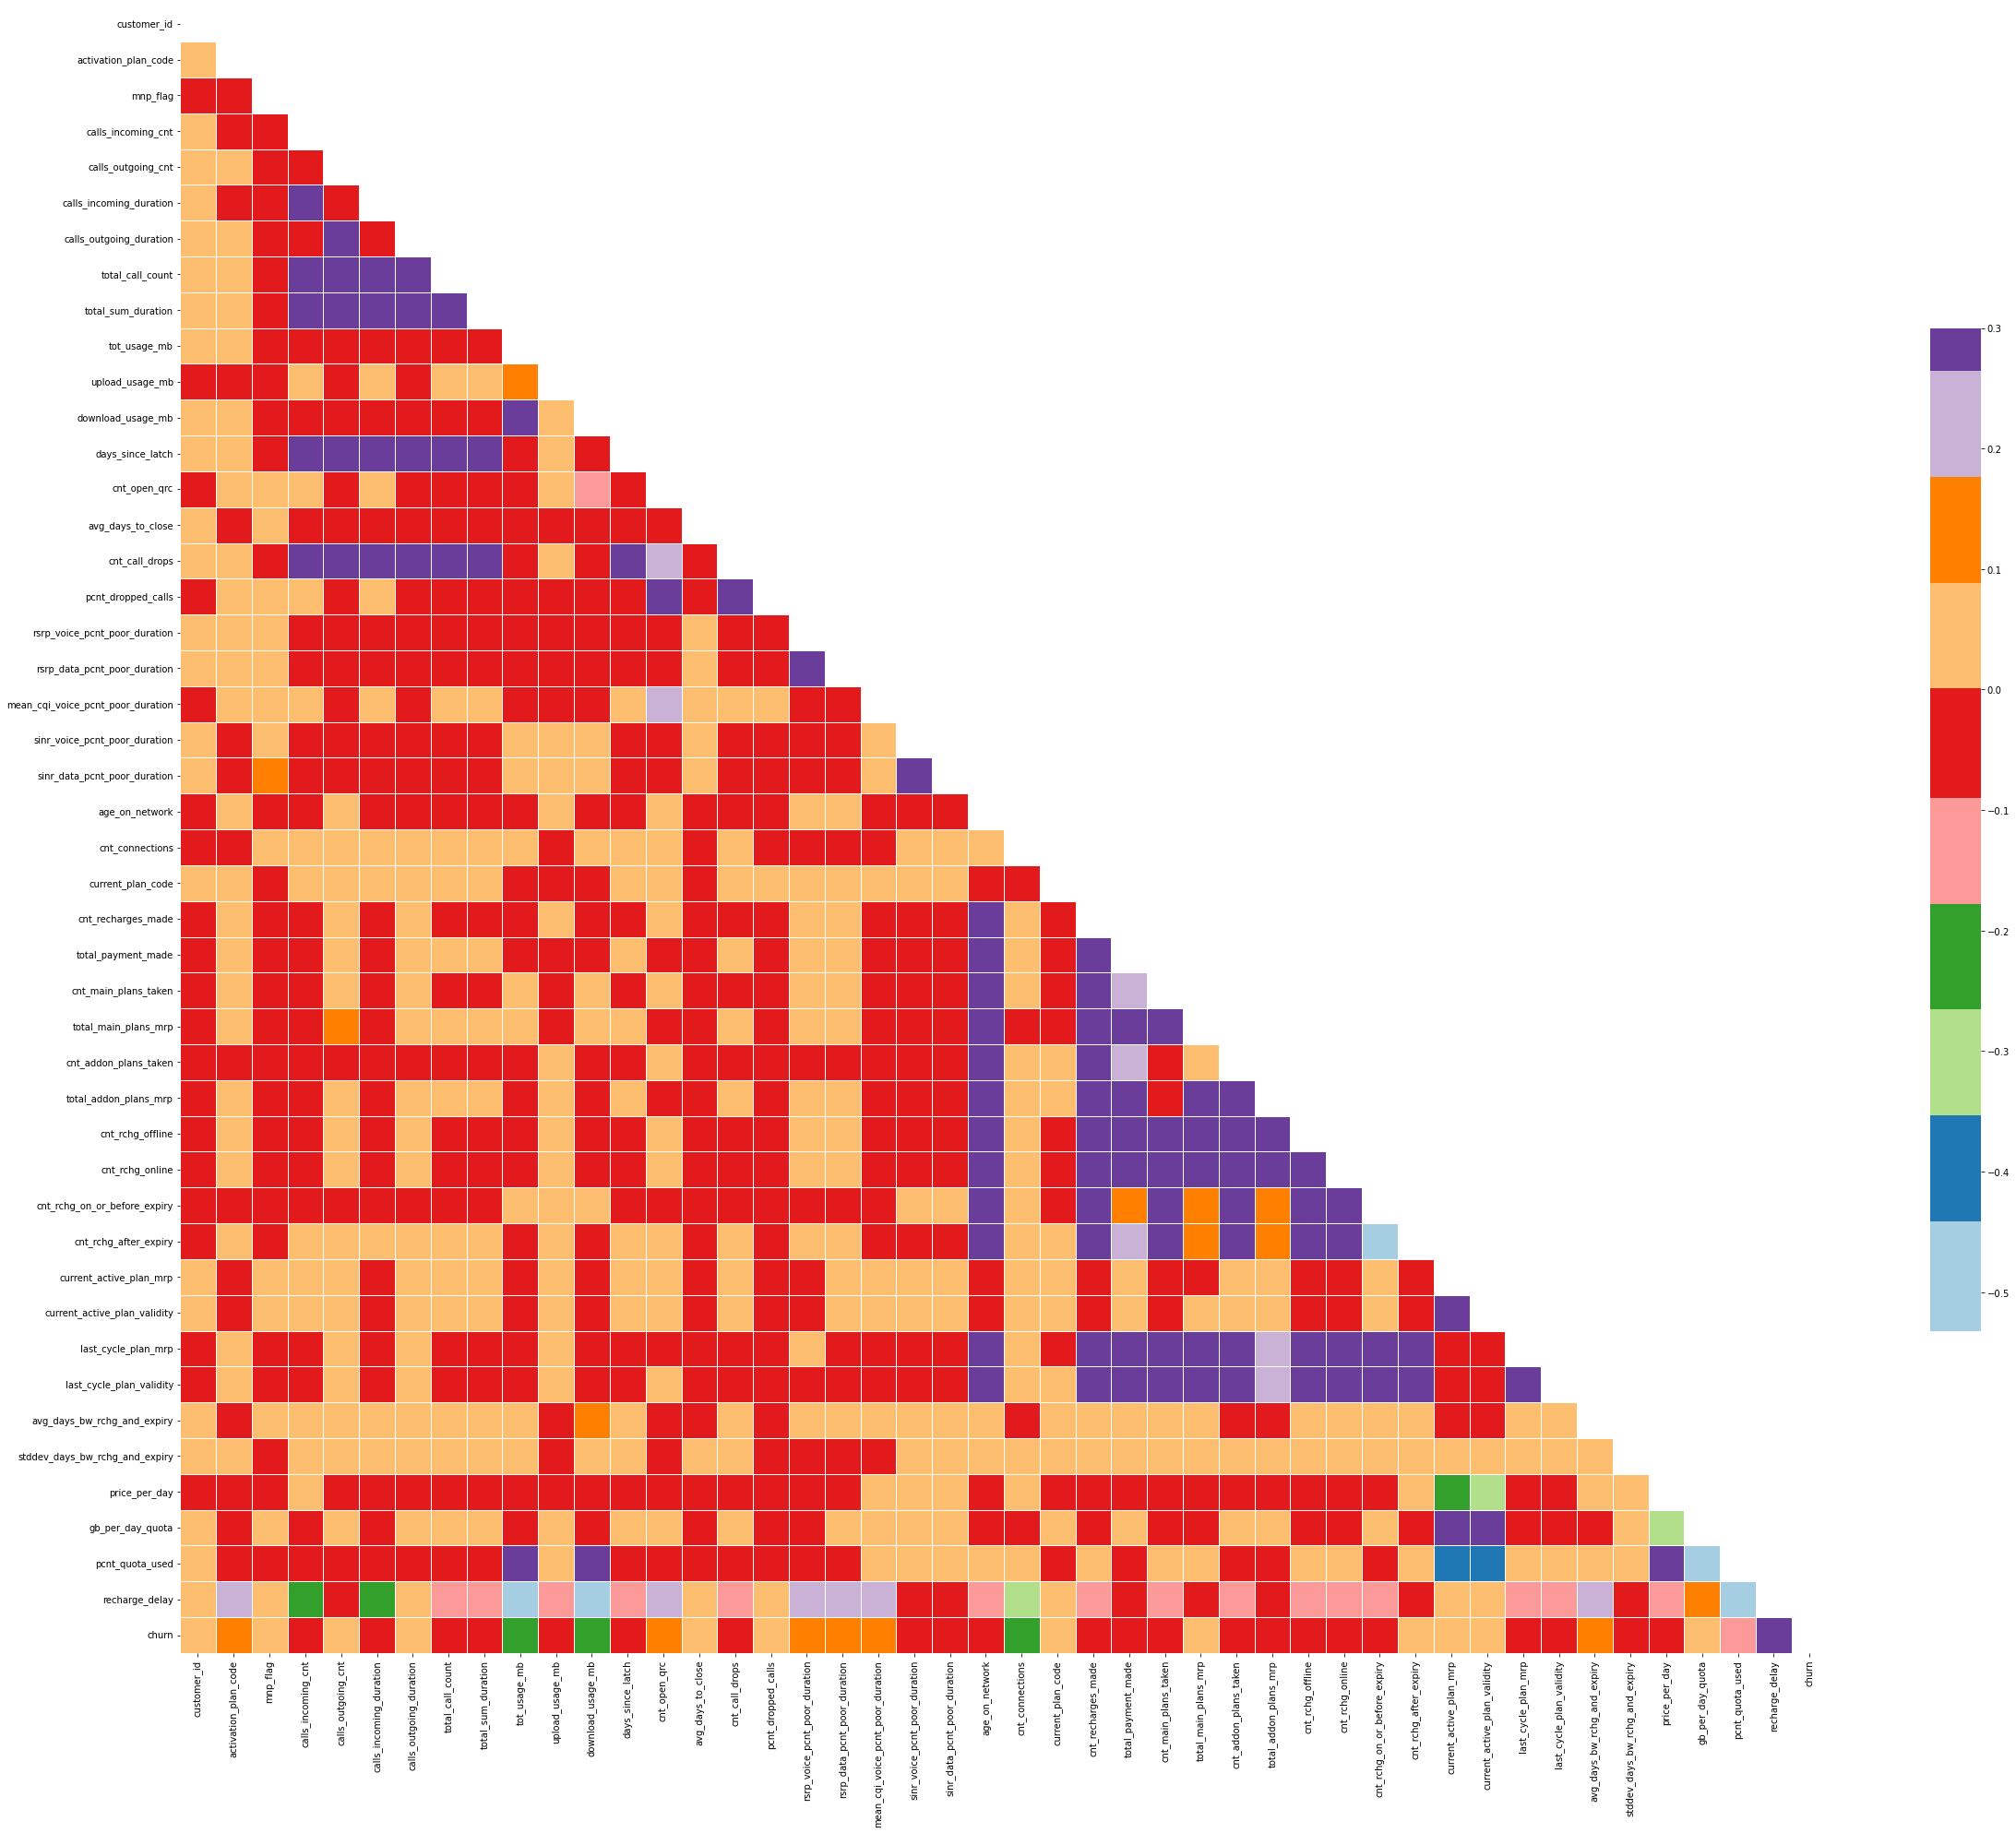

In [13]:
corr_matrix(df)

In [14]:
df.columns.tolist()

['customer_id',
 'ownership',
 'activation_plan_code',
 'mnp_flag',
 'calls_incoming_cnt',
 'calls_outgoing_cnt',
 'calls_incoming_duration',
 'calls_outgoing_duration',
 'total_call_count',
 'total_sum_duration',
 'tot_usage_mb',
 'upload_usage_mb',
 'download_usage_mb',
 'days_since_latch',
 'cnt_open_qrc',
 'avg_days_to_close',
 'cnt_call_drops',
 'pcnt_dropped_calls',
 'rsrp_voice_pcnt_poor_duration',
 'rsrp_data_pcnt_poor_duration',
 'mean_cqi_voice_pcnt_poor_duration',
 'sinr_voice_pcnt_poor_duration',
 'sinr_data_pcnt_poor_duration',
 'age_on_network',
 'cnt_connections',
 'current_plan_code',
 'cnt_recharges_made',
 'total_payment_made',
 'cnt_main_plans_taken',
 'total_main_plans_mrp',
 'cnt_addon_plans_taken',
 'total_addon_plans_mrp',
 'cnt_rchg_offline',
 'cnt_rchg_online',
 'cnt_rchg_on_or_before_expiry',
 'cnt_rchg_after_expiry',
 'current_active_plan_mrp',
 'current_active_plan_validity',
 'last_cycle_plan_mrp',
 'last_cycle_plan_validity',
 'avg_days_bw_rchg_and_expiry'

In [15]:
#removing the unneccessary columns 
col_to_drop = ['calls_incoming_cnt','calls_outgoing_cnt','calls_incoming_duration','calls_outgoing_duration',
               'total_call_count','total_sum_duration','tot_usage_mb','upload_usage_mb','download_usage_mb','current_plan_code',
               'cnt_recharges_made','price_per_day','gb_per_day_quota','pcnt_quota_used','device_avg_asp',]
df = df.drop(columns = col_to_drop, axis = 1)
df_test = df_test.drop(columns = col_to_drop, axis = 1)


In [16]:
target_col = ["churn"]
nlevels = 10

In [17]:
#seperating categorical columns and numerical columns
cat_cols = list(set(df.nunique()[df.nunique()<nlevels].keys().tolist() 
                    + df.select_dtypes(include='object').columns.tolist()))
cat_cols = [x for x in cat_cols if x not in target_col]


#numerical columns
num_cols = [x for x in df.columns if x not in cat_cols + target_col]

#binary columns
bin_cols = df.nunique()[df.nunique() == 2].keys().tolist()

multi_cols = [i for i in cat_cols if i not in bin_cols]



In [18]:
#label encoding for the binary columns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

le = LabelEncoder()
for i in bin_cols:
    df[i] = le.fit_transform(df[i])
    df_test[i] = le.transform(df_test[i])


In [19]:
#combining the train and test datasets
trainsize = df.shape[0]
comb = pd.concat((df,df_test), sort=False)

#Duplicating columns for multi value columns
comb = pd.get_dummies(data = comb, columns = multi_cols)

#Separating the train and test datasets
df = comb[:trainsize]
df_test = comb[trainsize:]



In [20]:
#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled, columns=num_cols)

scaled_test = std.transform(df_test[num_cols])
scaled_test = pd.DataFrame(scaled_test, columns=num_cols)

df_telcom_og = df.copy()
telcom = df.drop(columns = num_cols, axis = 1)
telcom = df.merge(scaled, left_index=True, right_index=True, how = "left")

df_telcom_test_og = df_test.copy()
telcom_test = df_test.drop(columns = num_cols, axis = 1)
telcom_test = df_test.merge(scaled_test, left_index=True, right_index=True, how = "left")

# PCA

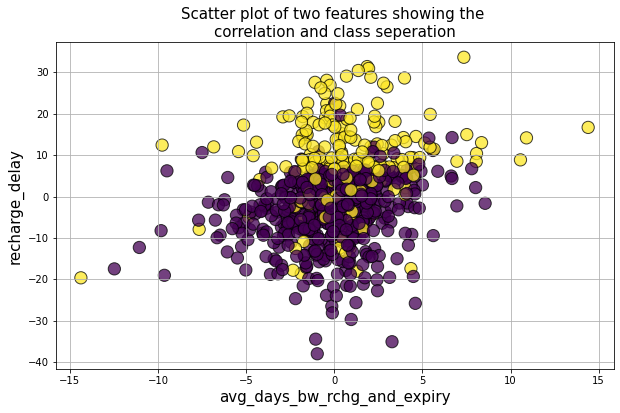

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(df['avg_days_bw_rchg_and_expiry'],df['recharge_delay'],c=df['churn'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Scatter plot of two features showing the \ncorrelation and class seperation",fontsize=15)
plt.xlabel("avg_days_bw_rchg_and_expiry",fontsize=15)
plt.ylabel("recharge_delay",fontsize=15)
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = df.drop('churn',axis=1) # Features
y = df['churn'] #target



In [23]:
X = scaler.fit_transform(X) # scaling the features


In [24]:
df_x = pd.DataFrame(data=X,columns=df.columns[1:]) # X is an array, we are turning it into a pandas df again

In [25]:
df_x.head(10)

,ownership,activation_plan_code,mnp_flag,days_since_latch,cnt_open_qrc,avg_days_to_close,cnt_call_drops,pcnt_dropped_calls,rsrp_voice_pcnt_poor_duration,rsrp_data_pcnt_poor_duration,...,cnt_connections_6,cnt_connections_7,cnt_connections_8,current_active_plan_mrp_99,current_active_plan_mrp_128,current_active_plan_mrp_300,current_active_plan_mrp_500,current_active_plan_mrp_999,current_active_plan_mrp_1500,current_active_plan_mrp_2999
0,-1.729887,0.43237,-0.524926,-0.326344,2.985728,0.282395,0.979186,3.272763,0.629669,-0.965042,...,2.630740,-0.349313,-0.395056,-0.442509,-0.411814,2.346074,-0.382272,-0.405565,-0.411814,-0.375802
1,-1.725557,0.43237,0.166904,-0.326344,-0.808684,0.282395,-0.323052,-0.566491,0.441837,0.288350,...,2.630740,-0.349313,-0.395056,-0.442509,-0.411814,-0.426244,-0.382272,2.465694,-0.411814,-0.375802
2,-1.721227,0.43237,0.858735,3.064247,-1.124885,-0.530252,1.304746,-0.987419,0.422913,1.038842,...,-0.380121,-0.349313,-0.395056,-0.442509,2.428282,-0.426244,-0.382272,-0.405565,-0.411814,-0.375802
3,-1.716897,0.43237,0.512819,-0.326344,-0.808684,1.095042,-0.974171,-0.476070,0.440224,-0.211442,...,-0.380121,2.862761,-0.395056,-0.442509,-0.411814,-0.426244,-0.382272,-0.405565,-0.411814,2.660979
4,-1.712567,0.43237,-0.870842,3.064247,-0.808684,1.095042,-0.323052,-0.770490,-0.606219,0.854311,...,-0.380121,2.862761,-0.395056,-0.442509,-0.411814,-0.426244,-0.382272,-0.405565,2.428282,-0.375802
5,-1.708236,0.43237,0.858735,-0.326344,0.139919,-0.530252,0.328067,0.603691,1.047787,-0.450092,...,-0.380121,-0.349313,-0.395056,-0.442509,-0.411814,-0.426244,-0.382272,-0.405565,-0.411814,2.660979
6,-1.703906,0.43237,-1.216757,-0.326344,0.456120,-1.342900,0.328067,1.028519,1.132910,-1.076446,...,-0.380121,-0.349313,-0.395056,-0.442509,-0.411814,2.346074,-0.382272,-0.405565,-0.411814,-0.375802
7,-1.699576,0.43237,-0.179011,-0.326344,2.353326,0.282395,0.328067,0.107371,-1.393971,0.828455,...,-0.380121,-0.349313,-0.395056,-0.442509,-0.411814,-0.426244,-0.382272,-0.405565,2.428282,-0.375802
8,-1.695246,0.43237,1.204650,-0.326344,0.456120,-0.530252,1.304746,0.543967,0.438803,1.580993,...,-0.380121,-0.349313,-0.395056,-0.442509,-0.411814,-0.426244,-0.382272,-0.405565,2.428282,-0.375802
9,-1.690916,0.43237,-1.562672,-0.326344,-0.176282,-1.342900,-1.625290,-0.470777,-0.865035,0.547736,...,-0.380121,-0.349313,-0.395056,-0.442509,-0.411814,-0.426244,-0.382272,2.465694,-0.411814,-0.375802


In [26]:
from sklearn.decomposition import PCA
pca = PCA()

In [27]:
df_x_pca = pca.fit(df_x)

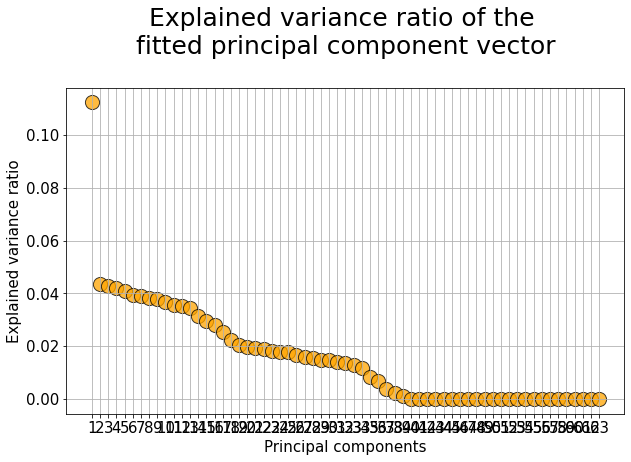

In [28]:
#Plot the explained variance ratio
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(df_x_pca.explained_variance_ratio_))],
            y=df_x_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(df_x_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

In [29]:
df_x_trans = pca.transform(df_x)
df_x_trans = pd.DataFrame(data=df_x_trans)
df_x_trans.shape

(800, 63)

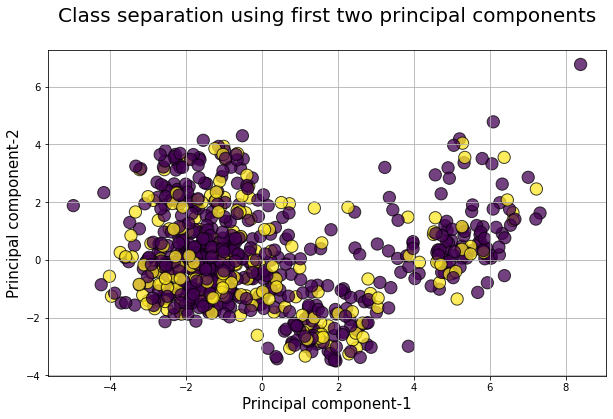

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(df_x_trans[0],df_x_trans[1],c=df['churn'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

In [31]:
def pca_scatter(pcadf, targetfeature, targetlabel, color):
    tracer = go.Scatter(x = pcadf[pcadf[targetfeature]==targetlabel]["PC1"],
                        y = pcadf[pcadf[targetfeature]==targetlabel]["PC2"],
                        name = targetlabel, mode = "markers",
                        marker = dict(color = color, line = dict(width = .5), symbol = "diamond-open"),
                       )
    return tracer

In [32]:
pca = PCA(n_components = 2)

X = df[[i for i in df.columns if i not in target_col]]
Y = df[target_col]

principal_components = pca.fit_transform(X)
pca_data = pd.DataFrame(principal_components, columns = ["PC1", "PC2"])
pca_data = pca_data.merge(Y, left_index=True, right_index=True, how="left")
pca_data["churn"] = pca_data["churn"].replace({1: "churn", 0: "Not churn"})

layout = go.Layout(dict(title = "Visualizing data with PCA",
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "first principal component (PC1)",
                                     zerolinewidth=1, ticklen=5, gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "second principal component (PC2)",
                                     zerolinewidth=1, ticklen=5, gridwidth=2),
                        height = 400
                       )
                  )
trace1 = pca_scatter(pca_data, 'churn', 'churn', 'red')
trace2 = pca_scatter(pca_data, 'churn', 'Not churn', 'royalblue')
data = [trace2, trace1]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# Model buidling

In [33]:
def telecom_churn_prediction(algorithm, training_x, testing_x, training_y, testing_y, cf, threshold_plot):
    #model
    algorithm.fit(training_x, training_y)
    predictions = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
        
    print('Algorithm:', type(algorithm).__name__)
    print("\nClassification report:\n", classification_report(testing_y, predictions))
    print("Accuracy Score:", accuracy_score(testing_y, predictions))
    
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y, predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y, predictions) 
    print("Area under curve:", model_roc_auc,"\n")
    
    fpr, tpr, thresholds = roc_curve(testing_y, probabilities[:,1])
     
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix,
                        x = ["Not churn", "Churn"],
                        y = ["Not churn", "Churn"],
                        showscale = False, colorscale = "Picnic",
                        name = "Confusion matrix")
    
    #plot roc curve
    trace2 = go.Scatter(x = fpr, y = tpr,
                        name = "Roc: " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'), width = 2))
    trace3 = go.Scatter(x = [0,1], y = [0,1],
                        line = dict(color = ('rgb(205, 12, 24)'), width = 2,
                        dash = 'dot'))
    
    if cf in ['coefficients', 'features']:
        if cf == 'coefficients':
            coefficients = pd.DataFrame(algorithm.coef_.ravel())
        elif cf == 'features':
            coefficients = pd.DataFrame(algorithm.feature_importances_)
        
        column_df = pd.DataFrame(training_x.columns.tolist())
        coef_sumry = (pd.merge(coefficients, column_df, left_index=True, 
                               right_index=True, how="left"))
        coef_sumry.columns = ["coefficients", "features"]
        coef_sumry = coef_sumry.sort_values(by = "coefficients", ascending=False)
        
        #plot coeffs
        trace4 = go.Bar(x = coef_sumry["features"], y = coef_sumry["coefficients"], 
                        name = "coefficients",
                        marker = dict(color = coef_sumry["coefficients"],
                                      colorscale = "Picnic",
                                      line = dict(width = .6, color = "black")
                                     )
                       )
        #subplots
        fig = make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                                subplot_titles=('Confusion matrix',
                                                'Receiver operating characteristic',
                                                'Feature importances')
                           )  
        fig.append_trace(trace1,1,1)
        fig.append_trace(trace2,1,2)
        fig.append_trace(trace3,1,2)
        fig.append_trace(trace4,2,1)
        fig['layout'].update(showlegend=False, title="Model performance",
                             autosize=False, height = 900, width = 800,
                             plot_bgcolor = 'rgba(240,240,240, 0.95)',
                             paper_bgcolor = 'rgba(240,240,240, 0.95)',
                             margin = dict(b = 195))
        fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
        fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
        fig["layout"]["xaxis3"].update(dict(showgrid = True, tickfont = dict(size = 10), tickangle = 90))
        
    elif cf == 'None':
        #subplots
        fig = make_subplots(rows=1, cols=2,
                            subplot_titles=('Confusion matrix',
                                            'Receiver operating characteristic')
                           )
        fig.append_trace(trace1,1,1)
        fig.append_trace(trace2,1,2)
        fig.append_trace(trace3,1,2)
        fig['layout'].update(showlegend=False, title="Model performance",
                         autosize=False, height = 500, width = 800,
                         plot_bgcolor = 'rgba(240,240,240,0.95)',
                         paper_bgcolor = 'rgba(240,240,240,0.95)',
                         margin = dict(b = 195))
        fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
        fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))  
        
    py.iplot(fig)
    
    if threshold_plot == True: 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm
from yellowbrick.classifier import DiscriminationThreshold

#defining the studied or used independent features (columns) as well the target  
cols = [i for i in df.columns if i not in target_col]
target_col = ['churn']

#splitting the principal training dataset to subtrain and subtest datasets
x_train, x_test, y_train, y_test = train_test_split(df[cols], df[target_col], 
                                                    test_size = .25, random_state = 111)

#splitting the no scaled principal training dataset to subtrain and subtest datasets
x_train_og, x_test_og, y_train_og, y_test_og = train_test_split(df_telcom_og[cols], telcom[target_col],
                                                                test_size = .25, random_state = 111)

# Logistic Regression

Algorithm: LogisticRegression

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.88       140
           1       0.82      0.53      0.65        60

    accuracy                           0.82       200
   macro avg       0.82      0.74      0.77       200
weighted avg       0.82      0.82      0.81       200

Accuracy Score: 0.825
Area under curve: 0.7416666666666666 



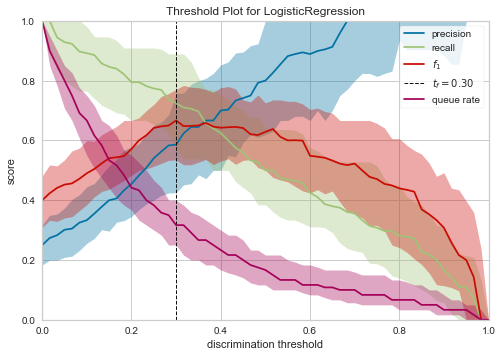

In [35]:
from sklearn.linear_model import LogisticRegression

#Baseline model        
logit = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                           verbose=0, warm_start=False)

telecom_churn_prediction(logit, x_train, x_test, y_train, y_test, "coefficients", threshold_plot=True)

# Decision Tree

In [36]:
def treeplot(classifier, cols, classnames):
    #plot decision tree
    graph = Source(tree.export_graphviz(classifier, out_file=None, 
                                        rounded=True, proportion=False,
                                        feature_names = cols, 
                                        precision = 2,
                                        class_names = classnames,
                                        filled = True)
                  )
    display(graph)

Algorithm: DecisionTreeClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       140
           1       0.65      0.60      0.63        60

    accuracy                           0.79       200
   macro avg       0.74      0.73      0.74       200
weighted avg       0.78      0.79      0.78       200

Accuracy Score: 0.785
Area under curve: 0.7321428571428572 



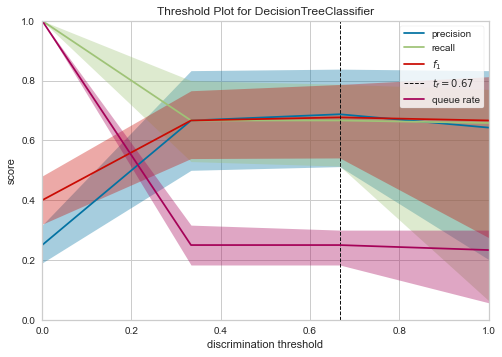

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG, display

decision_tree = DecisionTreeClassifier(max_depth = 9, random_state = 123,
                                       splitter = "best", criterion = "gini")

telecom_churn_prediction(decision_tree, x_train, x_test, y_train, y_test, "features", threshold_plot=True)

#plot decision tree
treeplot(decision_tree, cols, ["Not churn", "Churn"])

Algorithm: KNeighborsClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.71      0.91      0.80       140
           1       0.38      0.13      0.20        60

    accuracy                           0.68       200
   macro avg       0.55      0.52      0.50       200
weighted avg       0.61      0.68      0.62       200

Accuracy Score: 0.675
Area under curve: 0.5202380952380953 



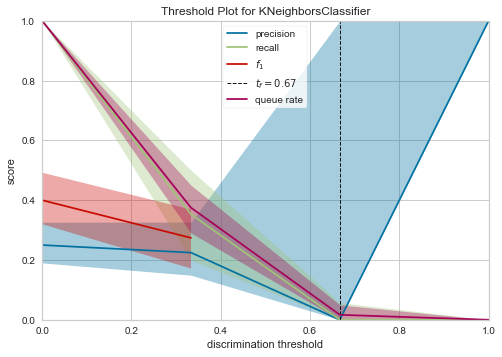

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                           weights='uniform')
telecom_churn_prediction(knn, x_train, x_test, y_train, y_test, 'None', threshold_plot=True)

# Random Forest

Algorithm: RandomForestClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.91       140
           1       0.93      0.62      0.74        60

    accuracy                           0.87       200
   macro avg       0.89      0.80      0.83       200
weighted avg       0.88      0.87      0.86       200

Accuracy Score: 0.87
Area under curve: 0.7976190476190476 



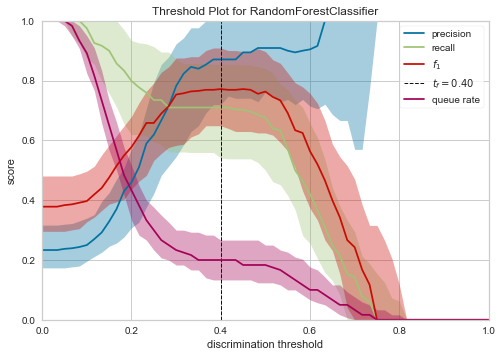

In [39]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100, random_state = 123,
                             max_depth = 9, criterion = "gini")

telecom_churn_prediction(rfc, x_train, x_test, y_train, y_test, 'features', threshold_plot=True)

# Naive Bayes

Algorithm: GaussianNB

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82       140
           1       0.58      0.65      0.61        60

    accuracy                           0.76       200
   macro avg       0.71      0.73      0.72       200
weighted avg       0.76      0.76      0.76       200

Accuracy Score: 0.755
Area under curve: 0.7250000000000001 



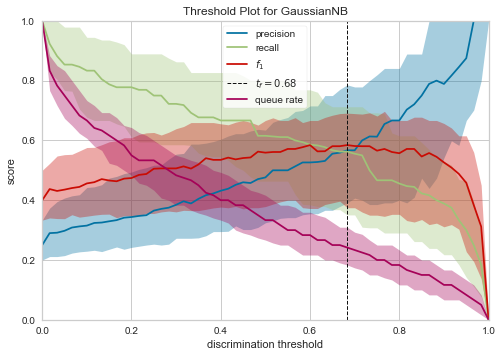

In [40]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB(priors=None)

telecom_churn_prediction(gnb, x_train, x_test, y_train, y_test, 'None', threshold_plot=True)

# ADA- Boost classifier

Algorithm: AdaBoostClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       140
           1       0.89      0.68      0.77        60

    accuracy                           0.88       200
   macro avg       0.88      0.82      0.85       200
weighted avg       0.88      0.88      0.87       200

Accuracy Score: 0.88
Area under curve: 0.8238095238095238 



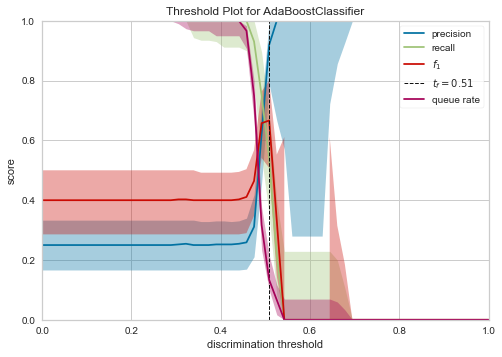

In [41]:
from sklearn.ensemble import AdaBoostClassifier

adac = AdaBoostClassifier(random_state=124)

telecom_churn_prediction(adac, x_train, x_test, y_train, y_test, "features", threshold_plot=True)

# Gradient Boosting Classifier

Algorithm: GradientBoostingClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       140
           1       0.93      0.70      0.80        60

    accuracy                           0.90       200
   macro avg       0.91      0.84      0.86       200
weighted avg       0.90      0.90      0.89       200

Accuracy Score: 0.895
Area under curve: 0.8392857142857142 



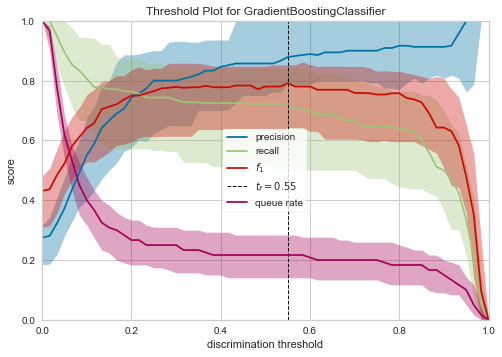

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=124)

telecom_churn_prediction(gbc, x_train, x_test, y_train, y_test, "features", threshold_plot=True)

# Linear Discriminant Analysis

Algorithm: LinearDiscriminantAnalysis

Classification report:
               precision    recall  f1-score   support

           0       0.80      0.94      0.87       140
           1       0.78      0.47      0.58        60

    accuracy                           0.80       200
   macro avg       0.79      0.70      0.73       200
weighted avg       0.80      0.80      0.78       200

Accuracy Score: 0.8
Area under curve: 0.7047619047619048 



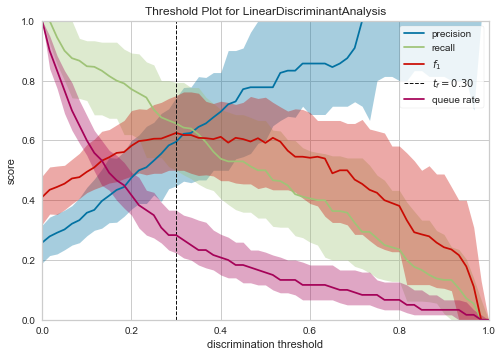

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

telecom_churn_prediction(lda, x_train, x_test, y_train, y_test, "None", threshold_plot=True)

# Quadratic Discriminant Analysis

Algorithm: QuadraticDiscriminantAnalysis

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.19      0.30       140
           1       0.33      0.92      0.48        60

    accuracy                           0.41       200
   macro avg       0.58      0.55      0.39       200
weighted avg       0.68      0.41      0.36       200

Accuracy Score: 0.405
Area under curve: 0.5511904761904762 



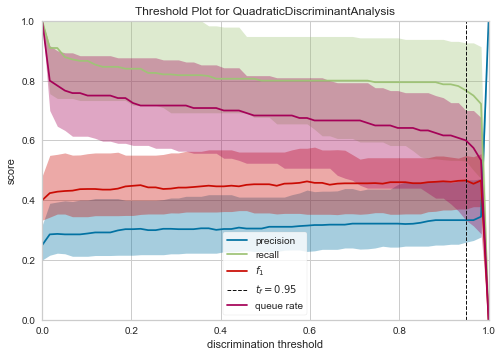

In [44]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()

telecom_churn_prediction(qda, x_train, x_test, y_train, y_test, "None", threshold_plot=True)

# Multi Layer Perceptron

Algorithm: MLPClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.68      0.90      0.78       140
           1       0.12      0.03      0.05        60

    accuracy                           0.64       200
   macro avg       0.40      0.47      0.42       200
weighted avg       0.52      0.64      0.56       200

Accuracy Score: 0.64
Area under curve: 0.46666666666666673 



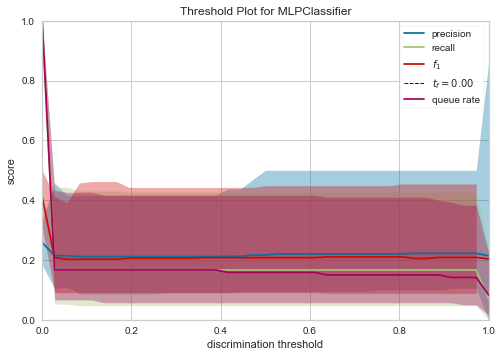

In [45]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=1, max_iter=1000, random_state=124)

telecom_churn_prediction(mlp, x_train, x_test, y_train, y_test, "None", threshold_plot=True)

# Model Performence Comperision

In [46]:
models = {'Logistic (Baseline)': [logit, cols],
          'Decision Tree': [decision_tree, cols],  
          'Random Forest': [rfc, cols], 
          'Naive Bayes': [gnb, cols],  
          'AdaBoost': [adac, cols], 
          'GradientBoost': [gbc, cols], 
          'LDA': [lda, cols], 
          'QDA': [qda, cols], 
          'MLP Classifier': [mlp, cols], 
         }

In [47]:
def model_report(model, training_x, testing_x, training_y, testing_y, name):
    model = model.fit(training_x, training_y)
    predictions = model.predict(testing_x)
    accuracy = accuracy_score(testing_y, predictions)
    recallscore = recall_score(testing_y, predictions)
    precision = precision_score(testing_y, predictions)
    roc_auc = roc_auc_score(testing_y, predictions)
    f1score = f1_score(testing_y, predictions) 
    kappa_metric = cohen_kappa_score(testing_y, predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy"        : [accuracy],
                       "Recall"          : [recallscore],
                       "Precision"       : [precision],
                       "f1-score"        : [f1score],
                       "Roc_auc"         : [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

In [48]:
#outputs for all models over the training dataset
model_performances_train = pd.DataFrame() 
for name in models:
    if name == 'Logistic (SMOTE)':
        model_performances_train = model_performances_train.append(model_report(models[name][0], 
                                                                                x_smote[models[name][1]], x_test[models[name][1]], 
                                                                                y_smote, y_test, name), ignore_index=True)
    else:
        model_performances_train = model_performances_train.append(model_report(models[name][0], x_train[models[name][1]], 
                                                                                x_test[models[name][1]], 
                                                                                y_train, y_test, name), ignore_index=True)
        
table_train = ff.create_table(np.round(model_performances_train, 4))
py.iplot(table_train)